### Student Performance Indicator

Life Cycle Of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- EDA
- Data Pre-Processing
- Model Training
- Choose Best Model

1) Problem Statement
  - This project help to understand how the student's performance(test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education,Lunch and Test preparation course.

2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- The data consists of 8 columns and 1000 rows

2.1 Import Data and Required Packages

Importing Pandas, NumPy, Matplotlib,Seaborn and Warnings Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas Dataframe

In [2]:
df = pd.read_csv('data/stud.csv')

Show top 5 records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [4]:
df.shape

(1000, 8)

2.2 Dataset Information
- gender : sex of students ->(Male/Female)
- race/ethnicity : ethnicity of students -> (Group A,B,C,D,E)
- parental level of education : parents' final education -> (bachelor's degree, some college, master's degree, high school)
- lunch : having lunch before test(standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

3. Data Checks to perform
- Check missing values
- Check duplicate data
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

3.1 Check missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

3.2 Check duplicate values

In [6]:
df.duplicated().sum()

0

There are no duplicate values in the dataset.

3.3 Check datatypes

In [7]:
# Check null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Check the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 Check statistics of data set


In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight
- From above description of numerical data, all means are very close to each other between 66.08 and 69.16.
- All standard deviations are also close between 14.6 and 15.19.
- While there is minimum score 0 for math, for writing minimum is much higer = 10 and for reading minimum is more higher = 17.

3.7 Check various categories present in the different categorical column(Exploring Data)

In [10]:
print("Categories in 'gender' variable:     ", end = " ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:     ", end = " ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:     ", end = " ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ", end = " ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ", end = " ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [11]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

# Print numerical and categorical columns
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


3.8 Adding columns for "Total Score" and "Average"

In [13]:
df['Total Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total Score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading_score'] == 100]['Average'].count()
writing_full = df[df['writing_score'] == 100]['Average'].count()
math_full = df[df['math_score'] == 100]['Average'].count()

print(f"Number of students who got full marks in reading: {reading_full}")
print(f"Number of students who got full marks in writing: {writing_full}")
print(f"Number of students who got full marks in math: {math_full}")

Number of students who got full marks in reading: 17
Number of students who got full marks in writing: 14
Number of students who got full marks in math: 7


In [15]:
reading_less_20 = df[df['reading_score'] < 20]['Average'].count()
writing_less_20 = df[df['writing_score'] < 20]['Average'].count()
math_less_20 = df[df['math_score'] < 20]['Average'].count()

print(f"Number of students who got less than 20 marks in reading: {reading_less_20}")
print(f"Number of students who got less than 20 marks in writing: {writing_less_20}")
print(f"Number of students who got less than 20 marks in math: {math_less_20}")

Number of students who got less than 20 marks in reading: 1
Number of students who got less than 20 marks in writing: 3
Number of students who got less than 20 marks in math: 4


Insights
- From above values we get students have performed worst in Maths.
- Best performance is in reading.

4. Exploring Data(Visualization)

4.1 Visualize average score distribution to make some conclusion.
- Histogram
- KDE(Kernel Distribution Function)

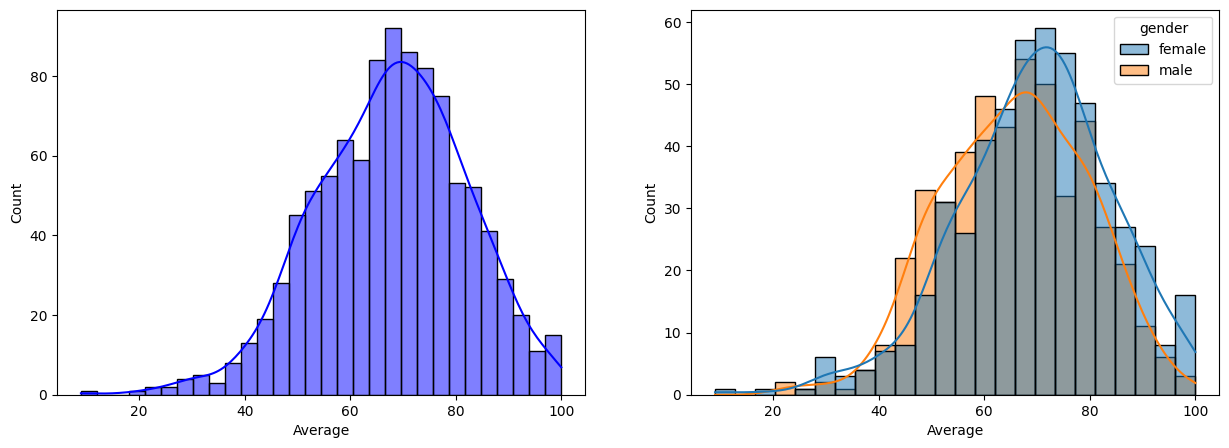

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data = df, x = 'Average', bins = 30, kde = True, color = 'blue')
plt.subplot(122)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'gender')
plt.show()

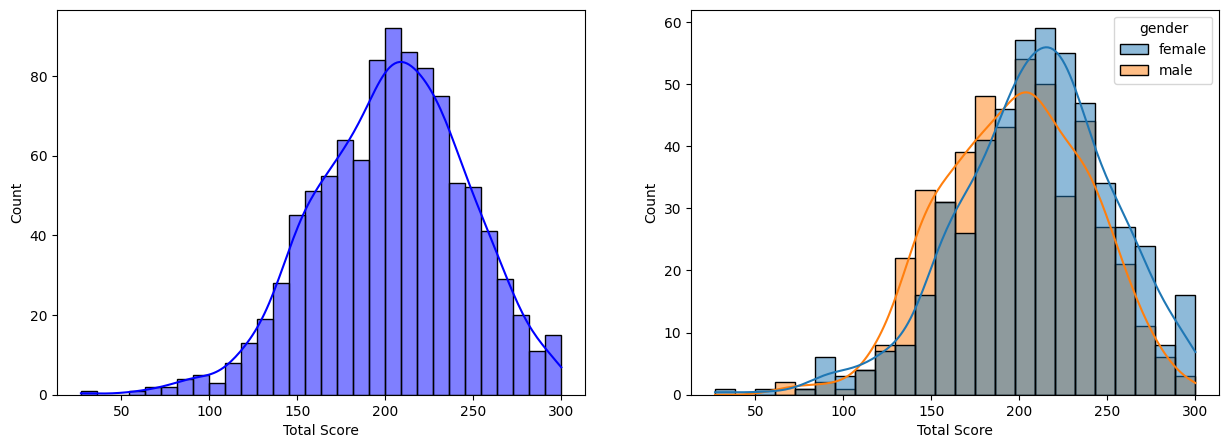

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data = df, x = 'Total Score', bins = 30, kde = True, color = 'blue')
plt.subplot(122)
sns.histplot(data = df, x = 'Total Score', kde = True, hue = 'gender')
plt.show()

Insights
- Female students tend to perform well than male students

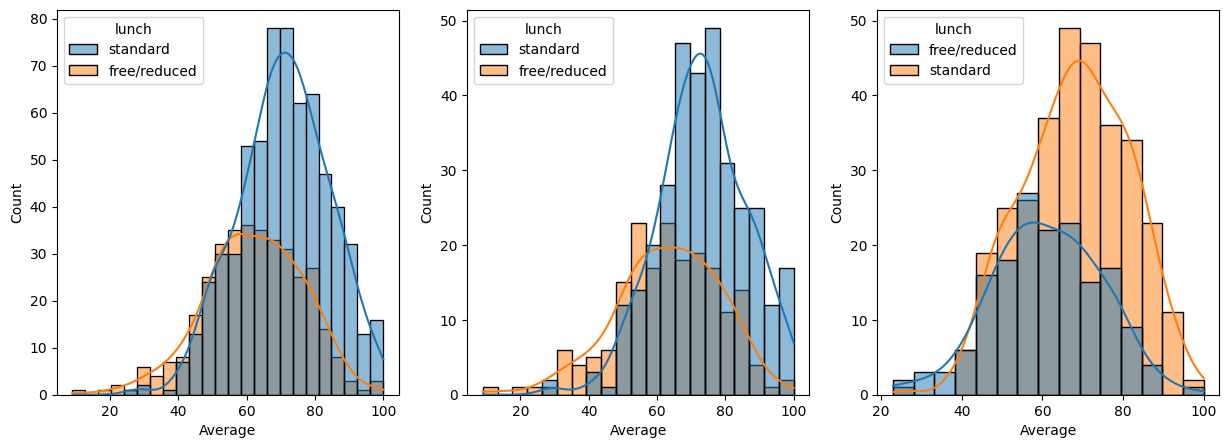

In [18]:
plt.subplots(1, 3, figsize=(15, 5))
plt.subplot(131)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'], x = 'Average', kde = True, hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'male'], x = 'Average', kde = True, hue = 'lunch')
plt.show()


Insights
- Standard lunch helps to perform well in exams.
- Standard lunch helps to perform well in exams for both male and female.

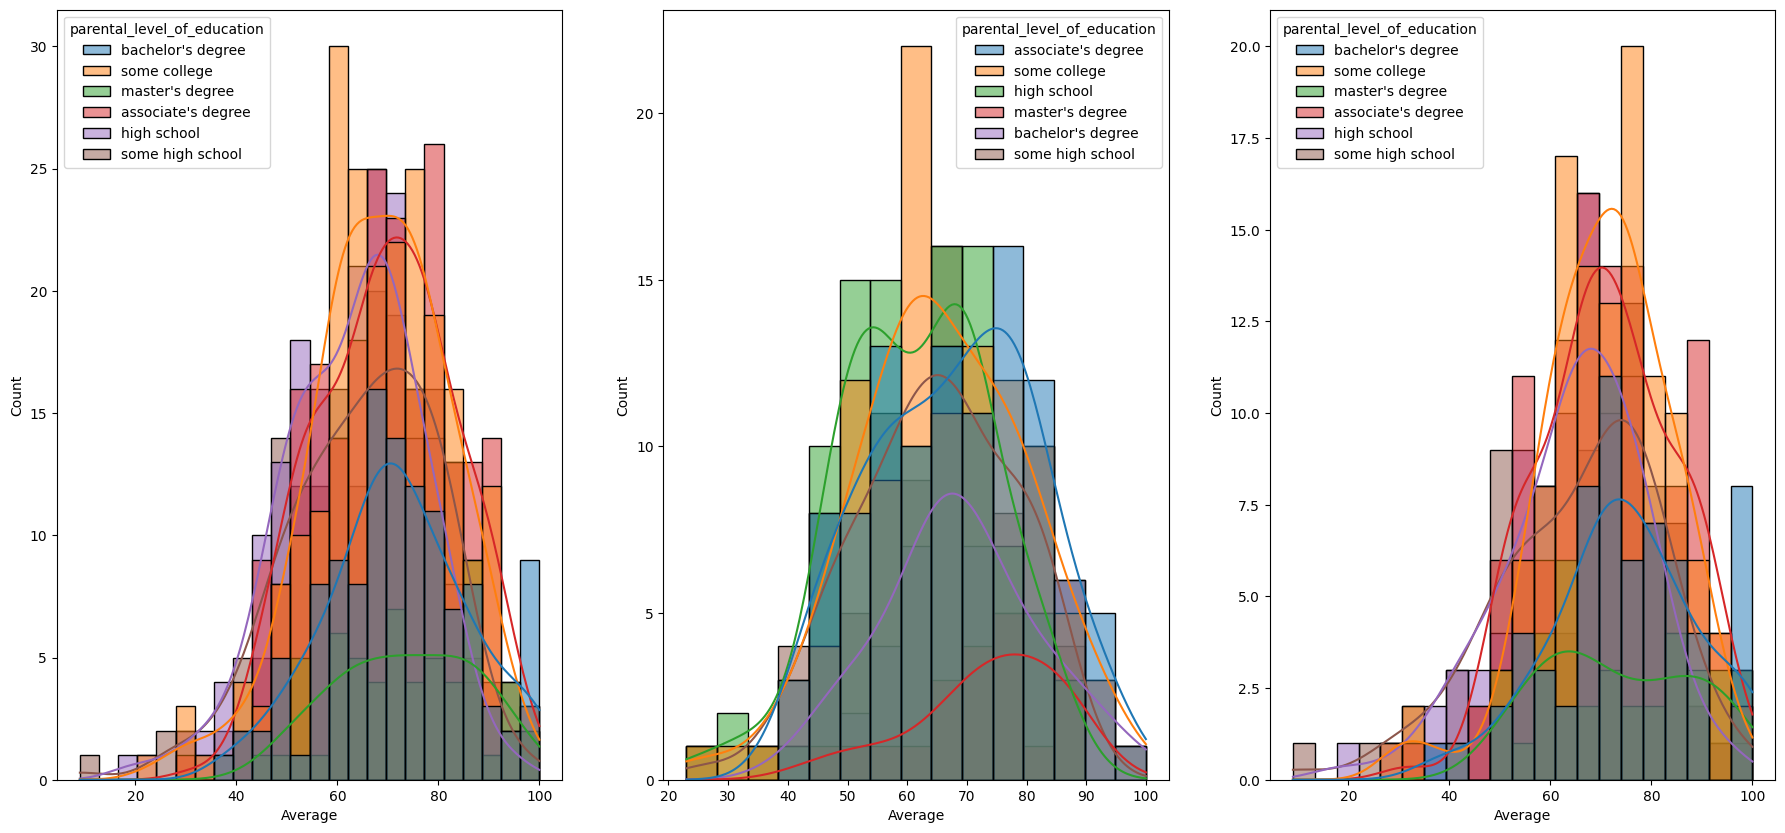

In [19]:
plt.subplots(1, 3, figsize=(30, 10))
plt.subplot(141)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'parental_level_of_education')
plt.subplot(142)
sns.histplot(data = df[df['gender'] == 'male'], x = 'Average', kde = True, hue = 'parental_level_of_education')
plt.subplot(143)
sns.histplot(data = df[df['gender'] == 'female'], x = 'Average', kde = True, hue = 'parental_level_of_education')
plt.show()

Insights
- In general parent's education don't help student perform well in exam.
- Second plot shows that parents whose education is of associate's degree or masters degree their child tend to perform well in the exam.
- In third plot we can see there is no effect of parent's education on female students.

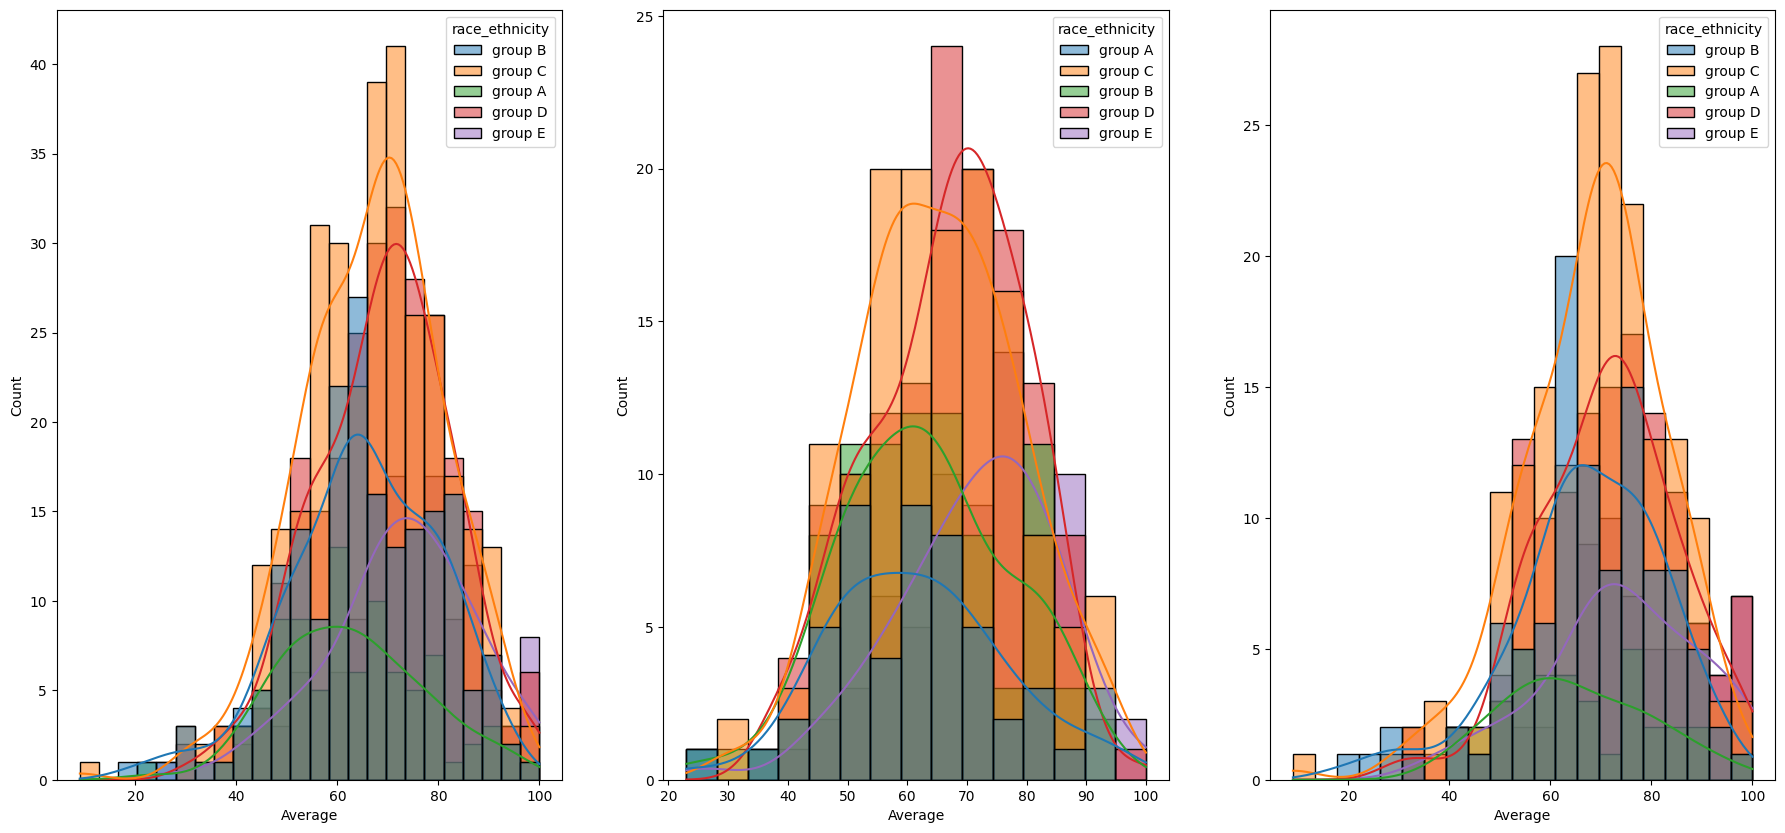

In [20]:
plt.subplots(1, 3, figsize=(30, 10))
plt.subplot(141)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'race_ethnicity')
plt.subplot(142)
sns.histplot(data = df[df['gender'] == 'male'], x = 'Average', kde = True, hue = 'race_ethnicity')
plt.subplot(143)
sns.histplot(data = df[df['gender'] == 'female'], x = 'Average', kde = True, hue = 'race_ethnicity')
plt.show()

Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam whether they are male or female.

4.2 Maximum score of students in all three subjects

In [21]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


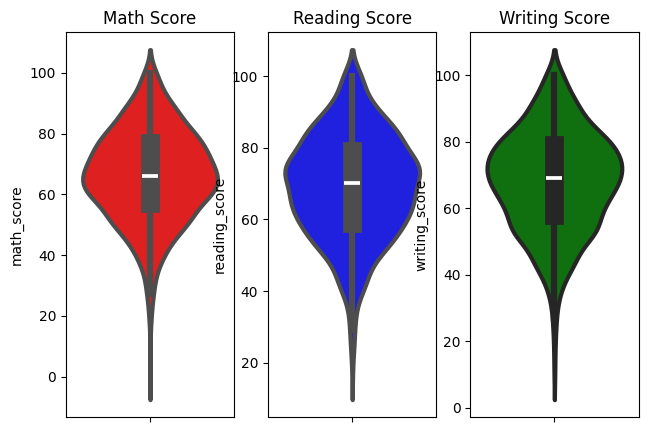

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.title('Math Score')
sns.violinplot(y = 'math_score', data = df, color = 'red', linewidth = 3)
plt.subplot(1, 4, 2)
plt.title('Reading Score')
sns.violinplot(y = 'reading_score', data = df, color = 'blue', linewidth = 3)
plt.subplot(1, 4, 3)
plt.title('Writing Score')
sns.violinplot(y = 'writing_score', data = df, color = 'green', linewidth = 3)
plt.show()

Insights
- From the above three plots it is clearly seen that most of the students score in between 60 to 80 in Maths where as in reading and writing most of the students score between 50 to 80.

4.3 Multivariate analysis using pieplot

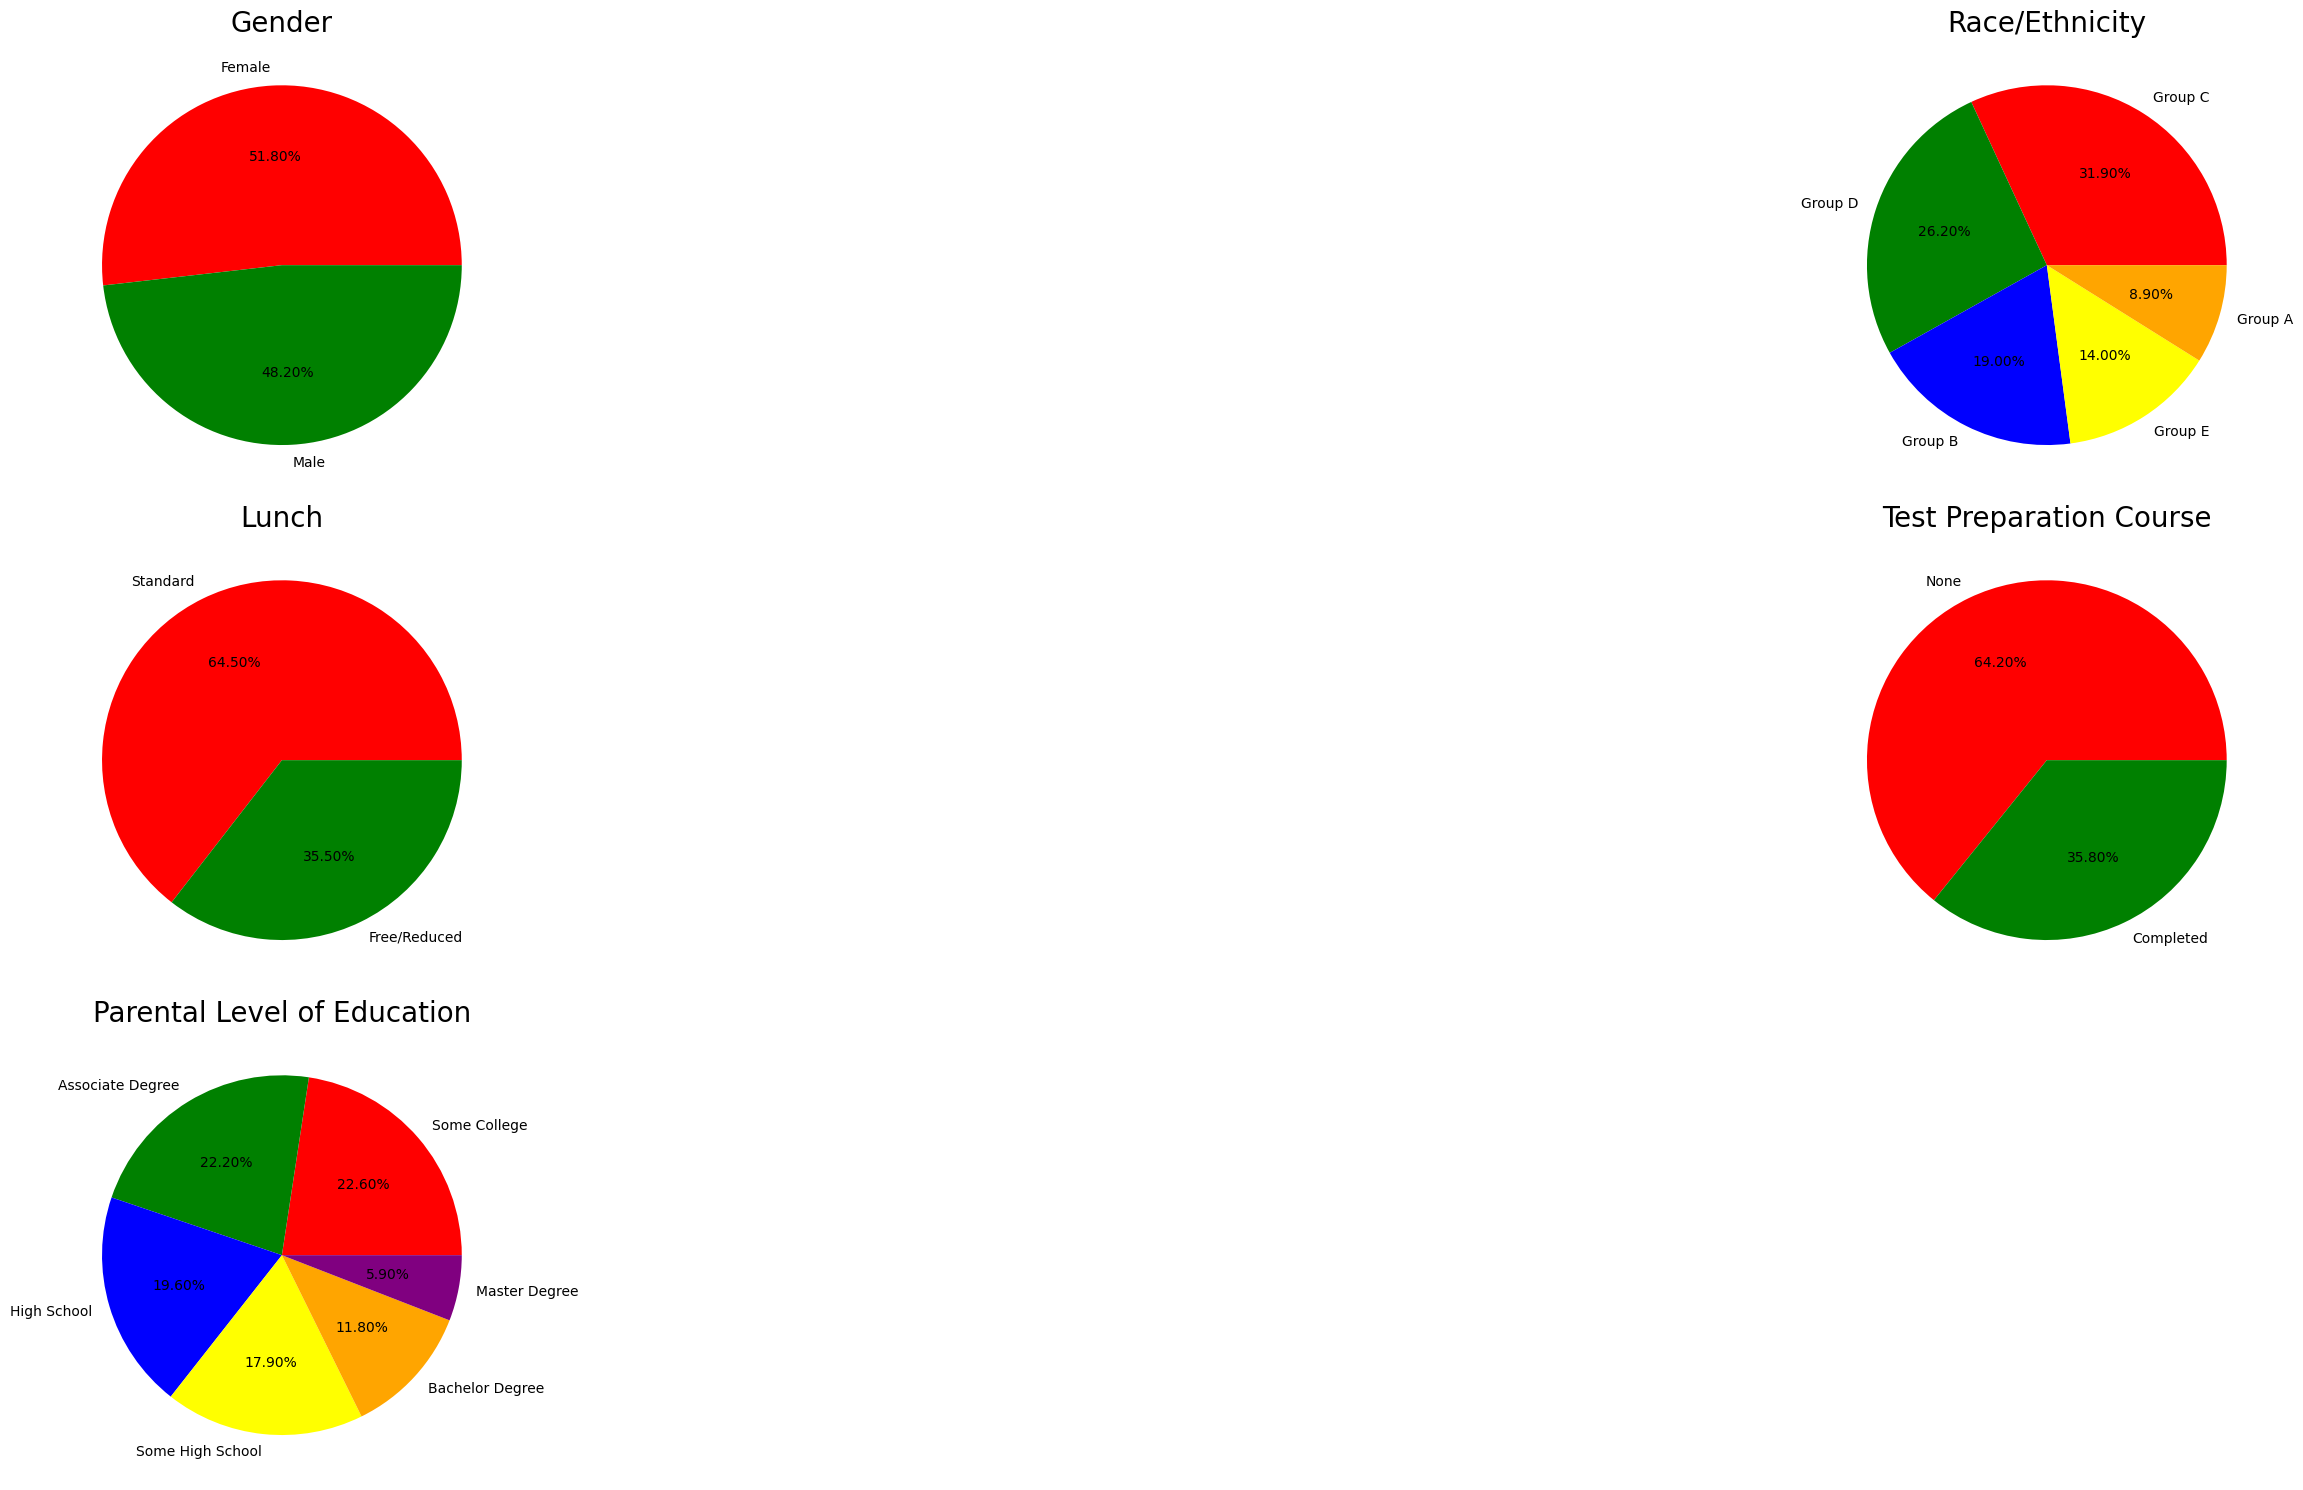

In [23]:
plt.rcParams['figure.figsize'] = (40, 15)
plt.subplot(3, 2, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(3, 2, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'yellow', 'orange']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(3, 2, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free/Reduced'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(3, 2, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Test Preparation Course', fontsize = 20)
plt.axis('off')

plt.subplot(3, 2, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', 'Associate Degree', 'High School', 'Some High School', 'Bachelor Degree', 'Master Degree'
color = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Parental Level of Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

Insights
- Number of Male and Female students is almost equal.
- Most number of students are in group C.
- Most number of students have standard lunch.
- Most number of students are not enrolled in any test preparation.
- Parental education of most students is 'Some College' followed by 'Associate's Degree'.

4.4 Feature Wise Visualization

4.4.1 Gender Column
- How is distribution of Gender?
- Does gender have amy impact on student's performance?

Univariate Analysis(How is the distribution of Gender?)

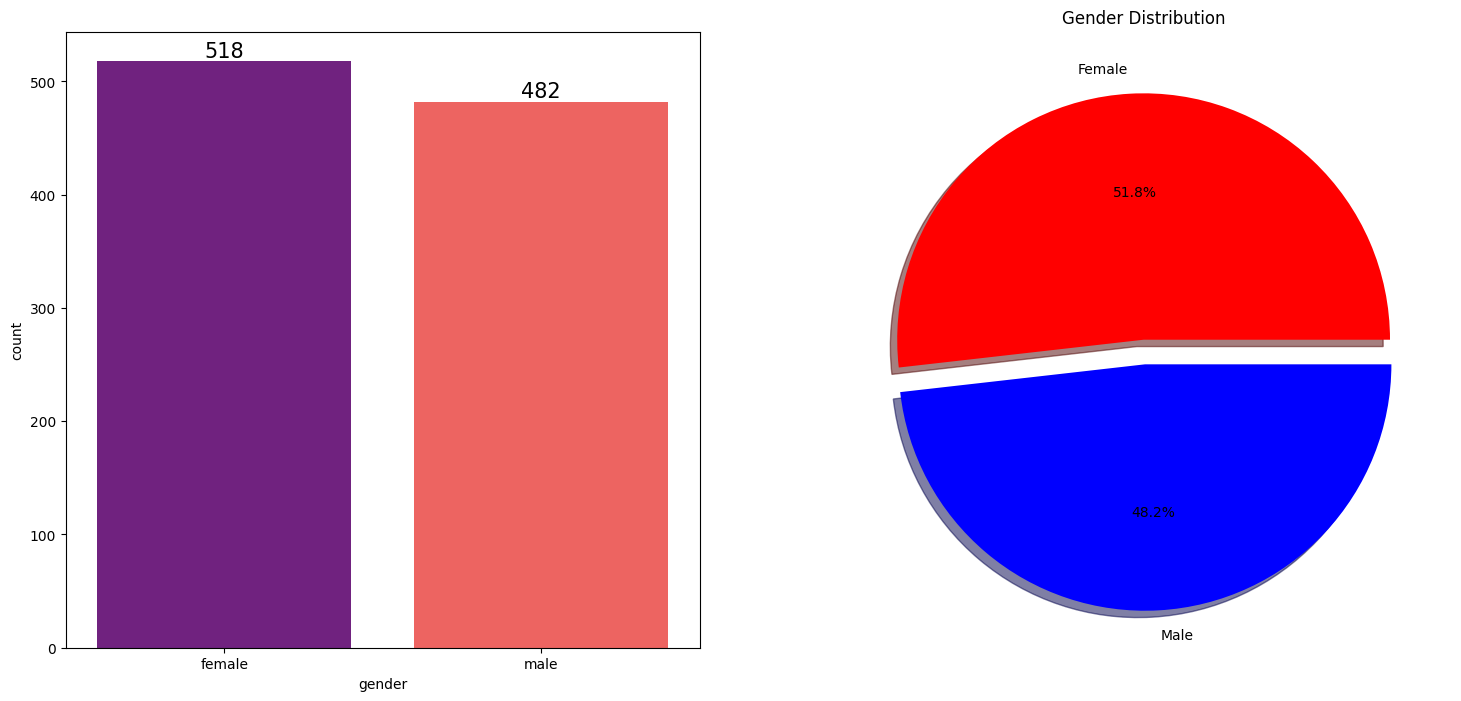

In [24]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Countplot for gender
sns.countplot(x='gender', data=df, palette='magma', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=15)

# Pie chart for gender distribution
sizes = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['red', 'blue']
explode = [0, 0.1]

ax[1].pie(sizes, labels=labels, autopct='%.1f%%', shadow=True, colors=colors, explode=explode)
ax[1].set_title('Gender Distribution')

plt.show()

Insights
- Gender has balanced data with female students are 518(48%) and male students are 482(52%).

Bivariate Analysis(Does gender have any impact on student's performance?)

In [25]:
gender_group = df.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'Total Score', 'Average']].mean()

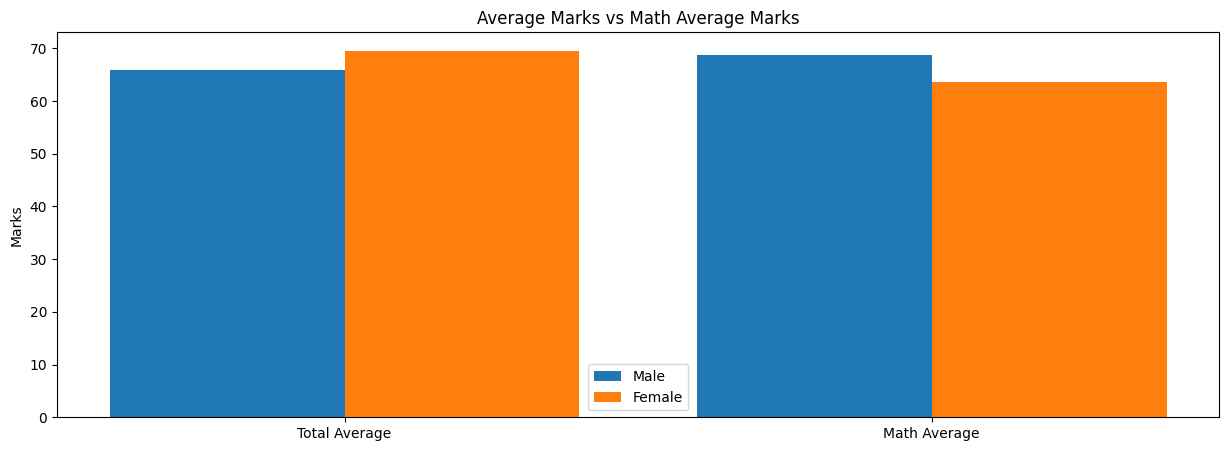

In [26]:
plt.figure(figsize=(15, 5))
X = ['Total Average', 'Math Average']

female_scores = [gender_group['Average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title('Average Marks vs Math Average Marks')
plt.legend()
plt.show()

Insights
- On total average females have a better overall score than men.
- But in math average males have scored higher than females.

4.4.2 Race/Ethnicity Column
- How is group wise distribution?
- Does race/ethnicity has any impact on student's performance?

Univariate Analysis(How is group wise distribution?)

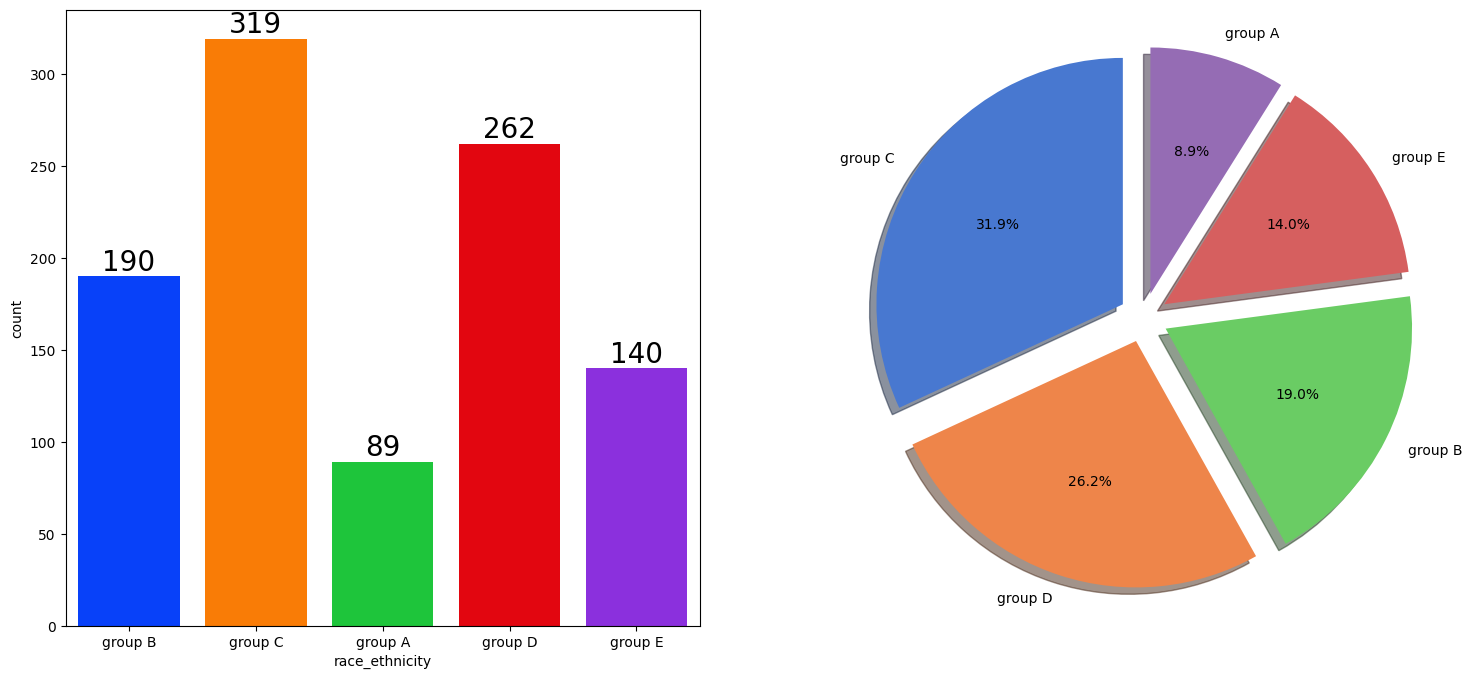

In [27]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.countplot(x = df['race_ethnicity'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', fontsize = 20)

plt.pie(x = df['race_ethnicity'].value_counts(), labels = df['race_ethnicity'].value_counts().index, autopct = '%.1f%%', shadow = True, colors = sns.color_palette('muted'), explode = [0.1, 0.1, 0.1, 0.1, 0.1], startangle = 90)
plt.show()

Insights
- Most of the students belong to group C followed by group D.
- Least number of students belong to group A.

Bivariate Analysis(Does race/ethnicity have any impact on student's performance?)

In [28]:
race_group = df.groupby('race_ethnicity')[['math_score', 'reading_score', 'writing_score', 'Total Score', 'Average']].mean()

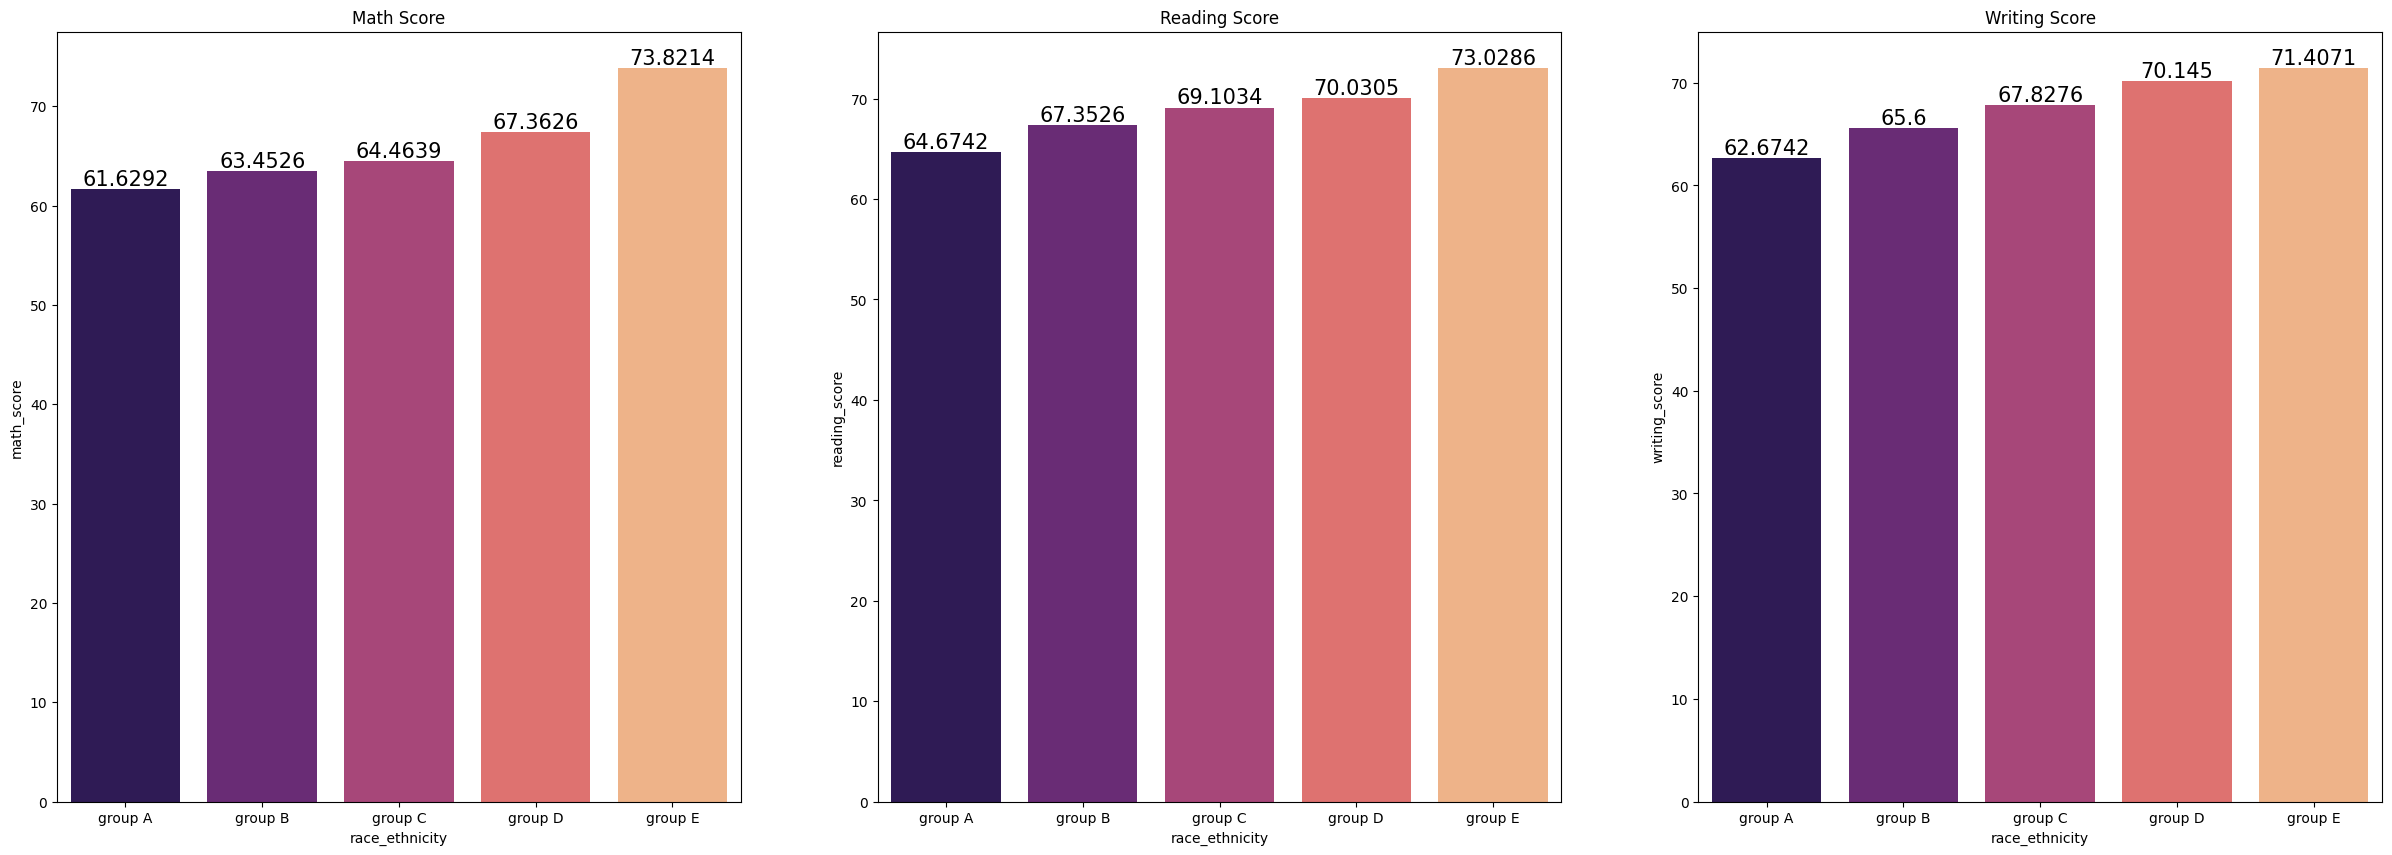

In [29]:
f, ax = plt.subplots(1, 3, figsize=(30, 10))

# Math Score
sns.barplot(x = race_group.index, y = race_group['math_score'], ax = ax[0], palette = 'magma')
ax[0].set_title('Math Score')
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', fontsize = 15)

# Reading Score
sns.barplot(x = race_group.index, y = race_group['reading_score'], ax = ax[1], palette = 'magma')
ax[1].set_title('Reading Score')
for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', fontsize = 15)

# Writing Score
sns.barplot(x = race_group.index, y = race_group['writing_score'], ax = ax[2], palette = 'magma')
ax[2].set_title('Writing Score')
for container in ax[2].containers:
    ax[2].bar_label(container, color = 'black', fontsize = 15)

plt.show()

Insights
- Group E students have scored the highest marks.
- Group A students have score the lowest marks.
- Students from lower socioeconomic status have a lower average in all course subjects.

4.4.3 Parental Level of education column
- What is education background of student's parent?
- Does parental education have any impact on student's performance?

Univariate Analysis(What is educational background of student's parent?)

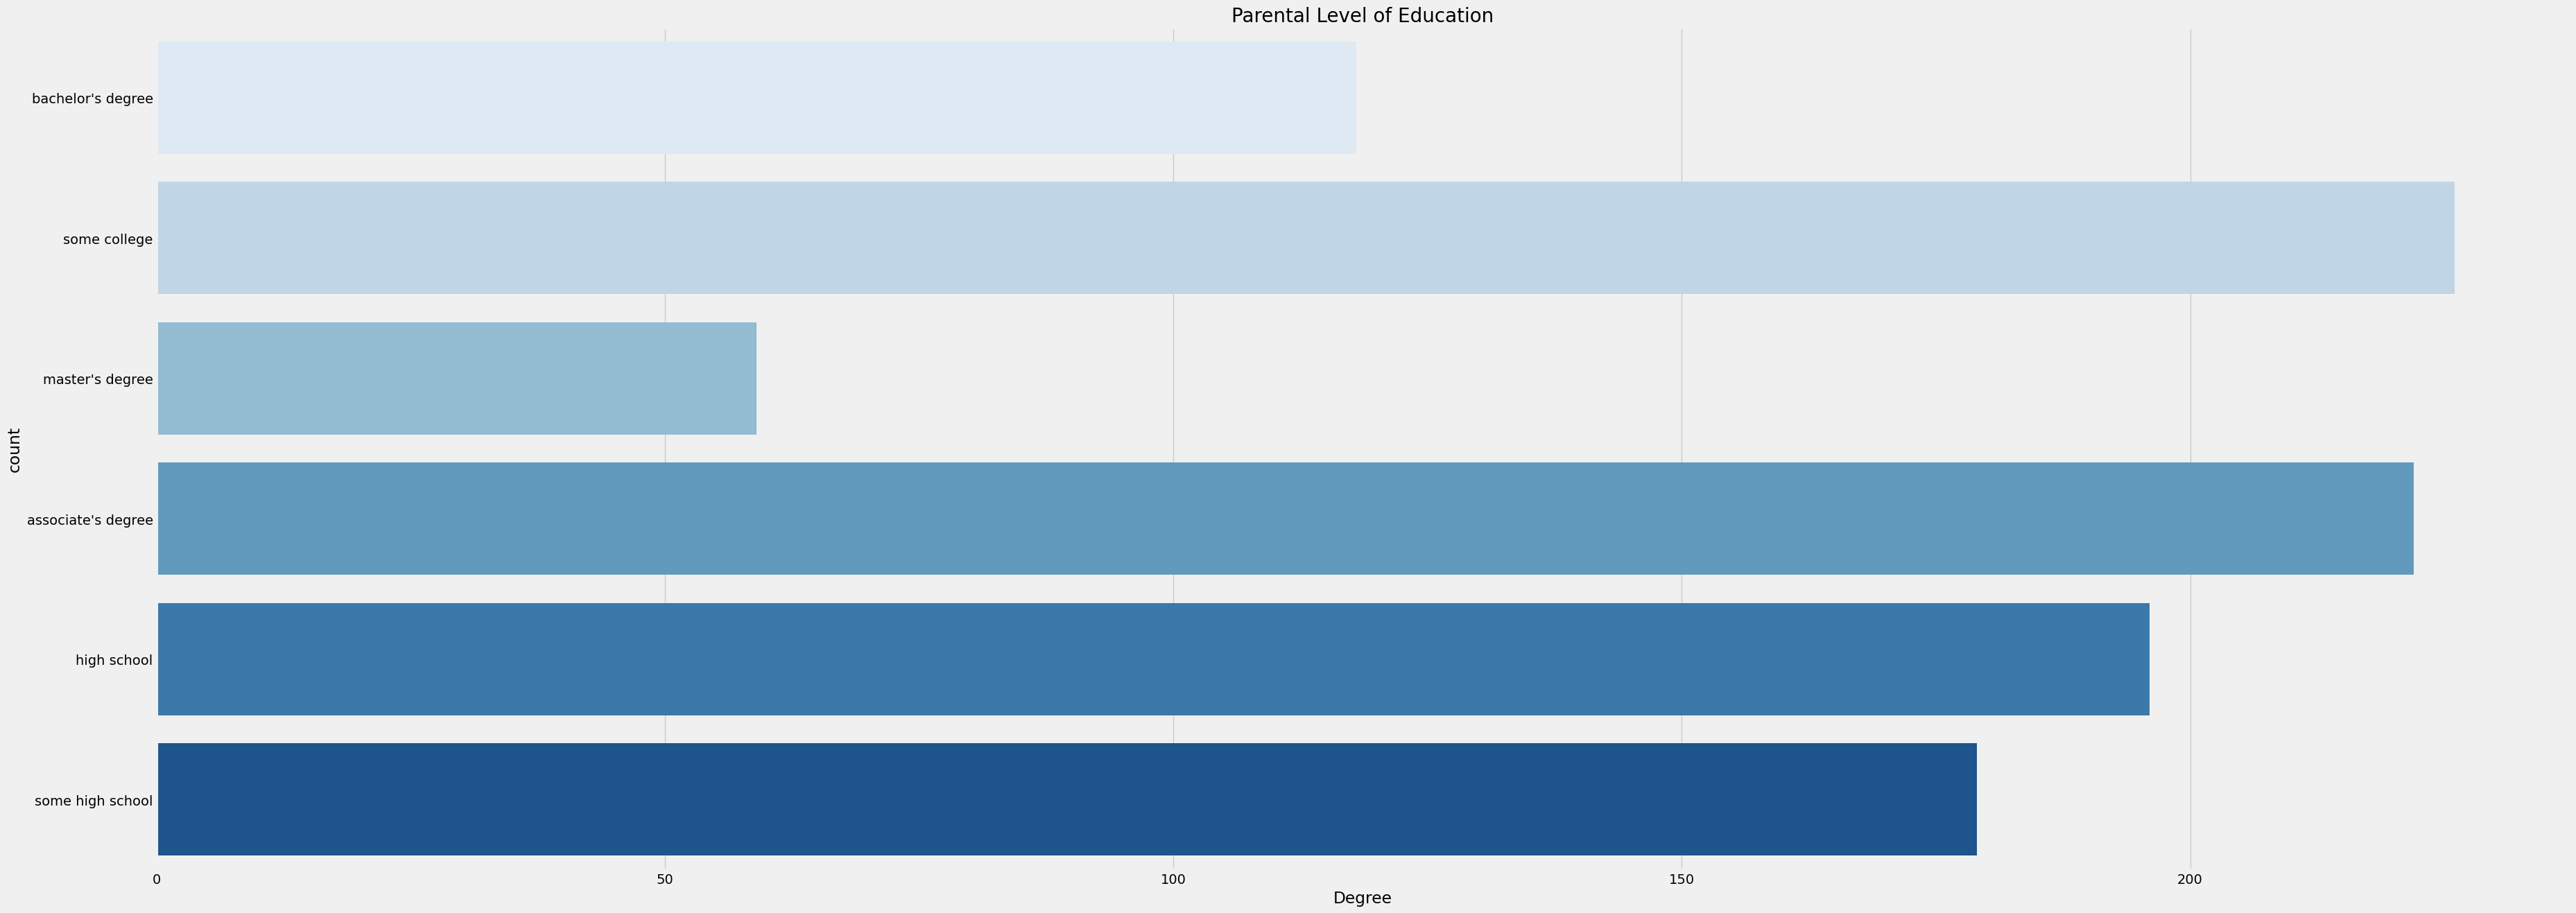

In [30]:
plt.rcParams['figure.figsize'] = (40, 15)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Parental Level of Education', fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights
- Largest number of parents are from some college.

Bivariate Analysis(Does parental education have any impact on student's performance?)

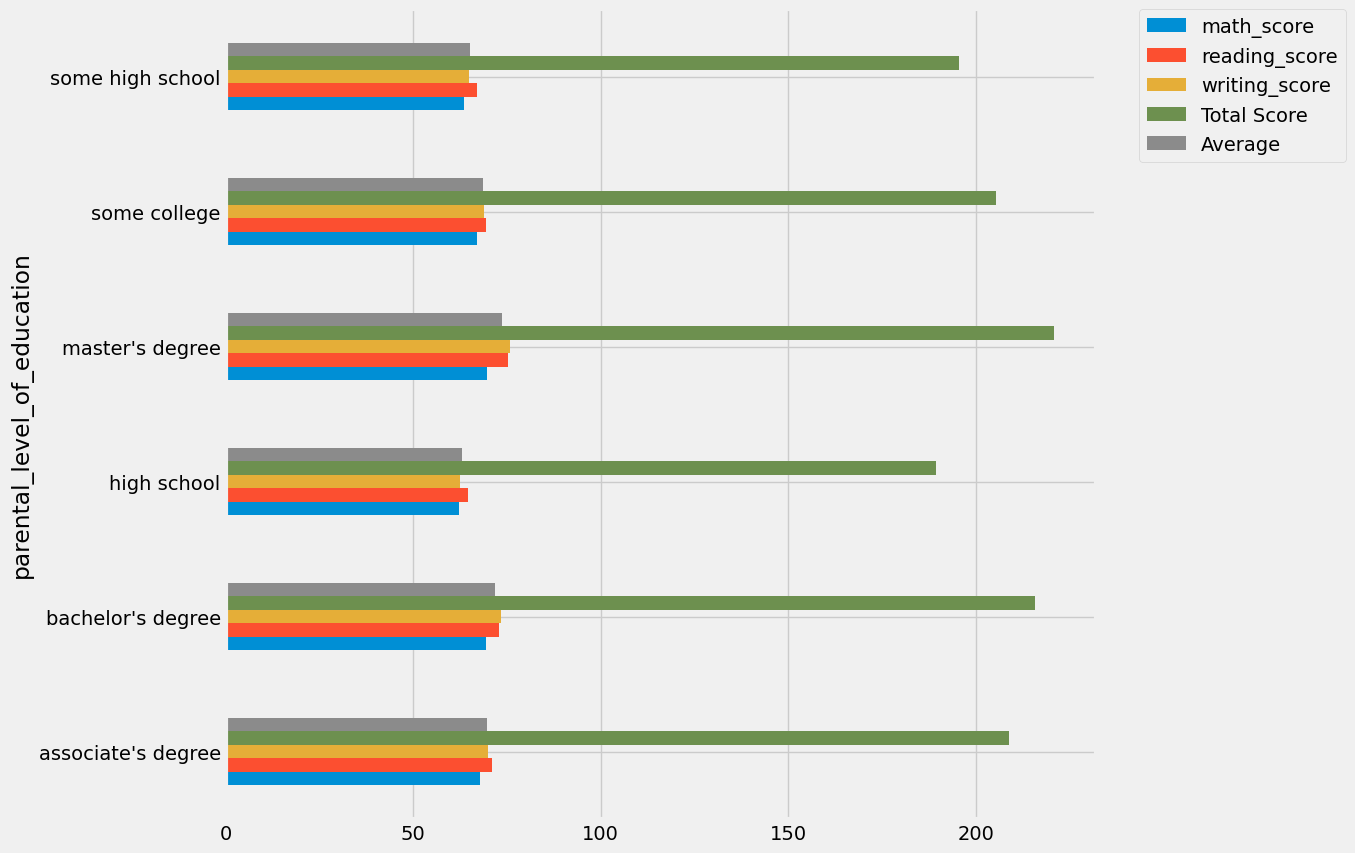

In [31]:
df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score', 'Total Score', 'Average']].mean().plot(kind = 'barh', figsize = (10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

Insights
- The score of student whose parents possess master and bachelor level eucation are higher than others.

4.4.4 Lunch Column
- Which type of lunch is the most common among students?
- What is the effect of lunch type on test results?

Univariate Analysis (Which type of lunch is the most common among students?)

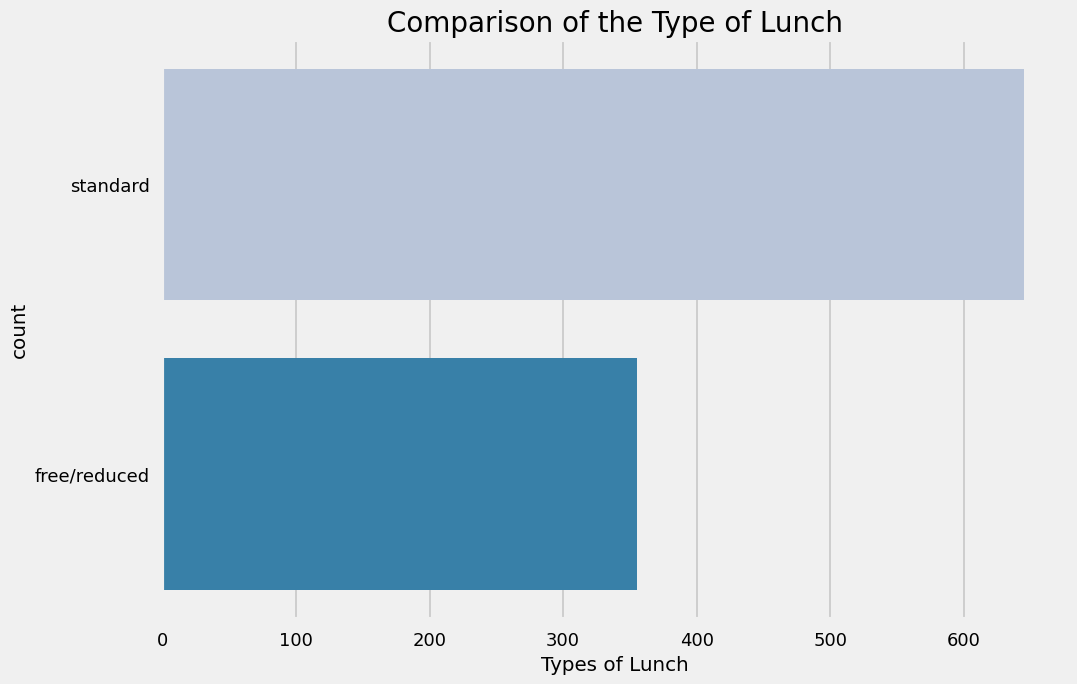

In [39]:
plt.rcParams['figure.figsize'] = (40, 15)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of the Type of Lunch', fontsize = 20)
plt.xlabel('Types of Lunch')
plt.ylabel('count')
plt.show()

Insights
- Students being seved standard type of lunch were more than free lunch.

Bivariate Analysis (Does the lunch type have effect on test results?)

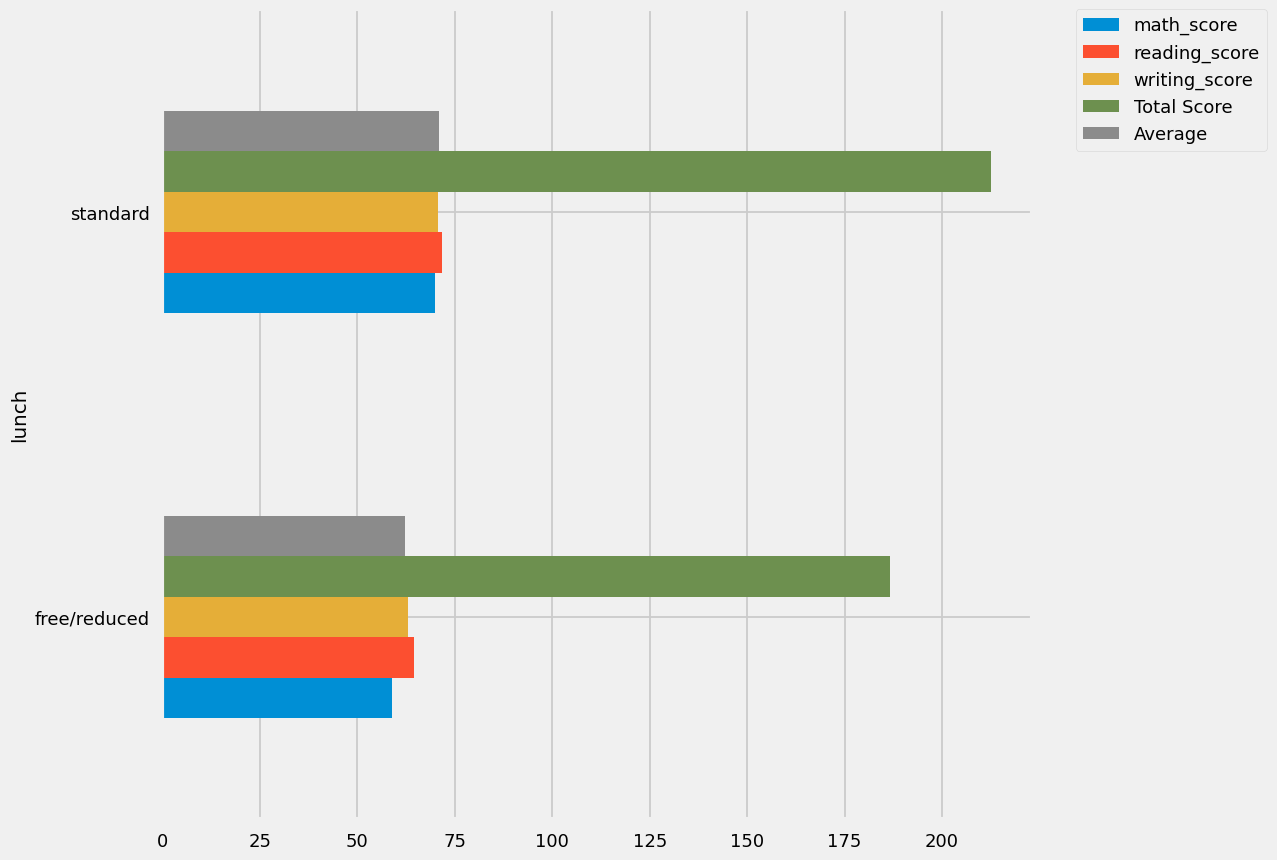

In [40]:
df.groupby('lunch')[['math_score', 'reading_score', 'writing_score', 'Total Score', 'Average']].mean().plot(kind = 'barh', figsize = (10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

Insights
- Students who got standard lunch tend to perform better than students who get free lunch.

4.4.5 Test Preparaton Course Column
- Which type of test preparation is most common among students?
- Does test preparation column has any impact on student's performance?

Univariate Analysis (Which type of test preparation is most common among students?)

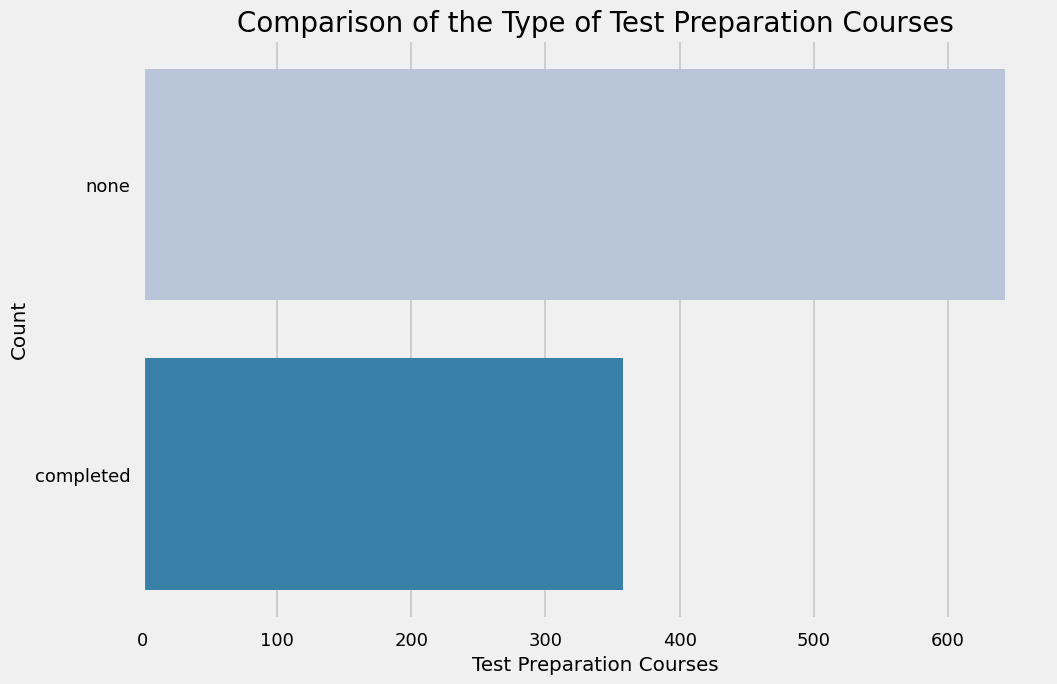

In [43]:
plt.rcParams['figure.figsize'] = (40, 15)
plt.style.use('seaborn-talk')
sns.countplot(df['test_preparation_course'], palette = 'PuBu')
plt.title('Comparison of the Type of Test Preparation Courses', fontsize = 20)
plt.xlabel('Test Preparation Courses')
plt.ylabel('Count')
plt.show()

Insight
- Most students take none type of test preparation courses.

Bivariate Analysis (Does test preparation column has any impact on student's performance?)

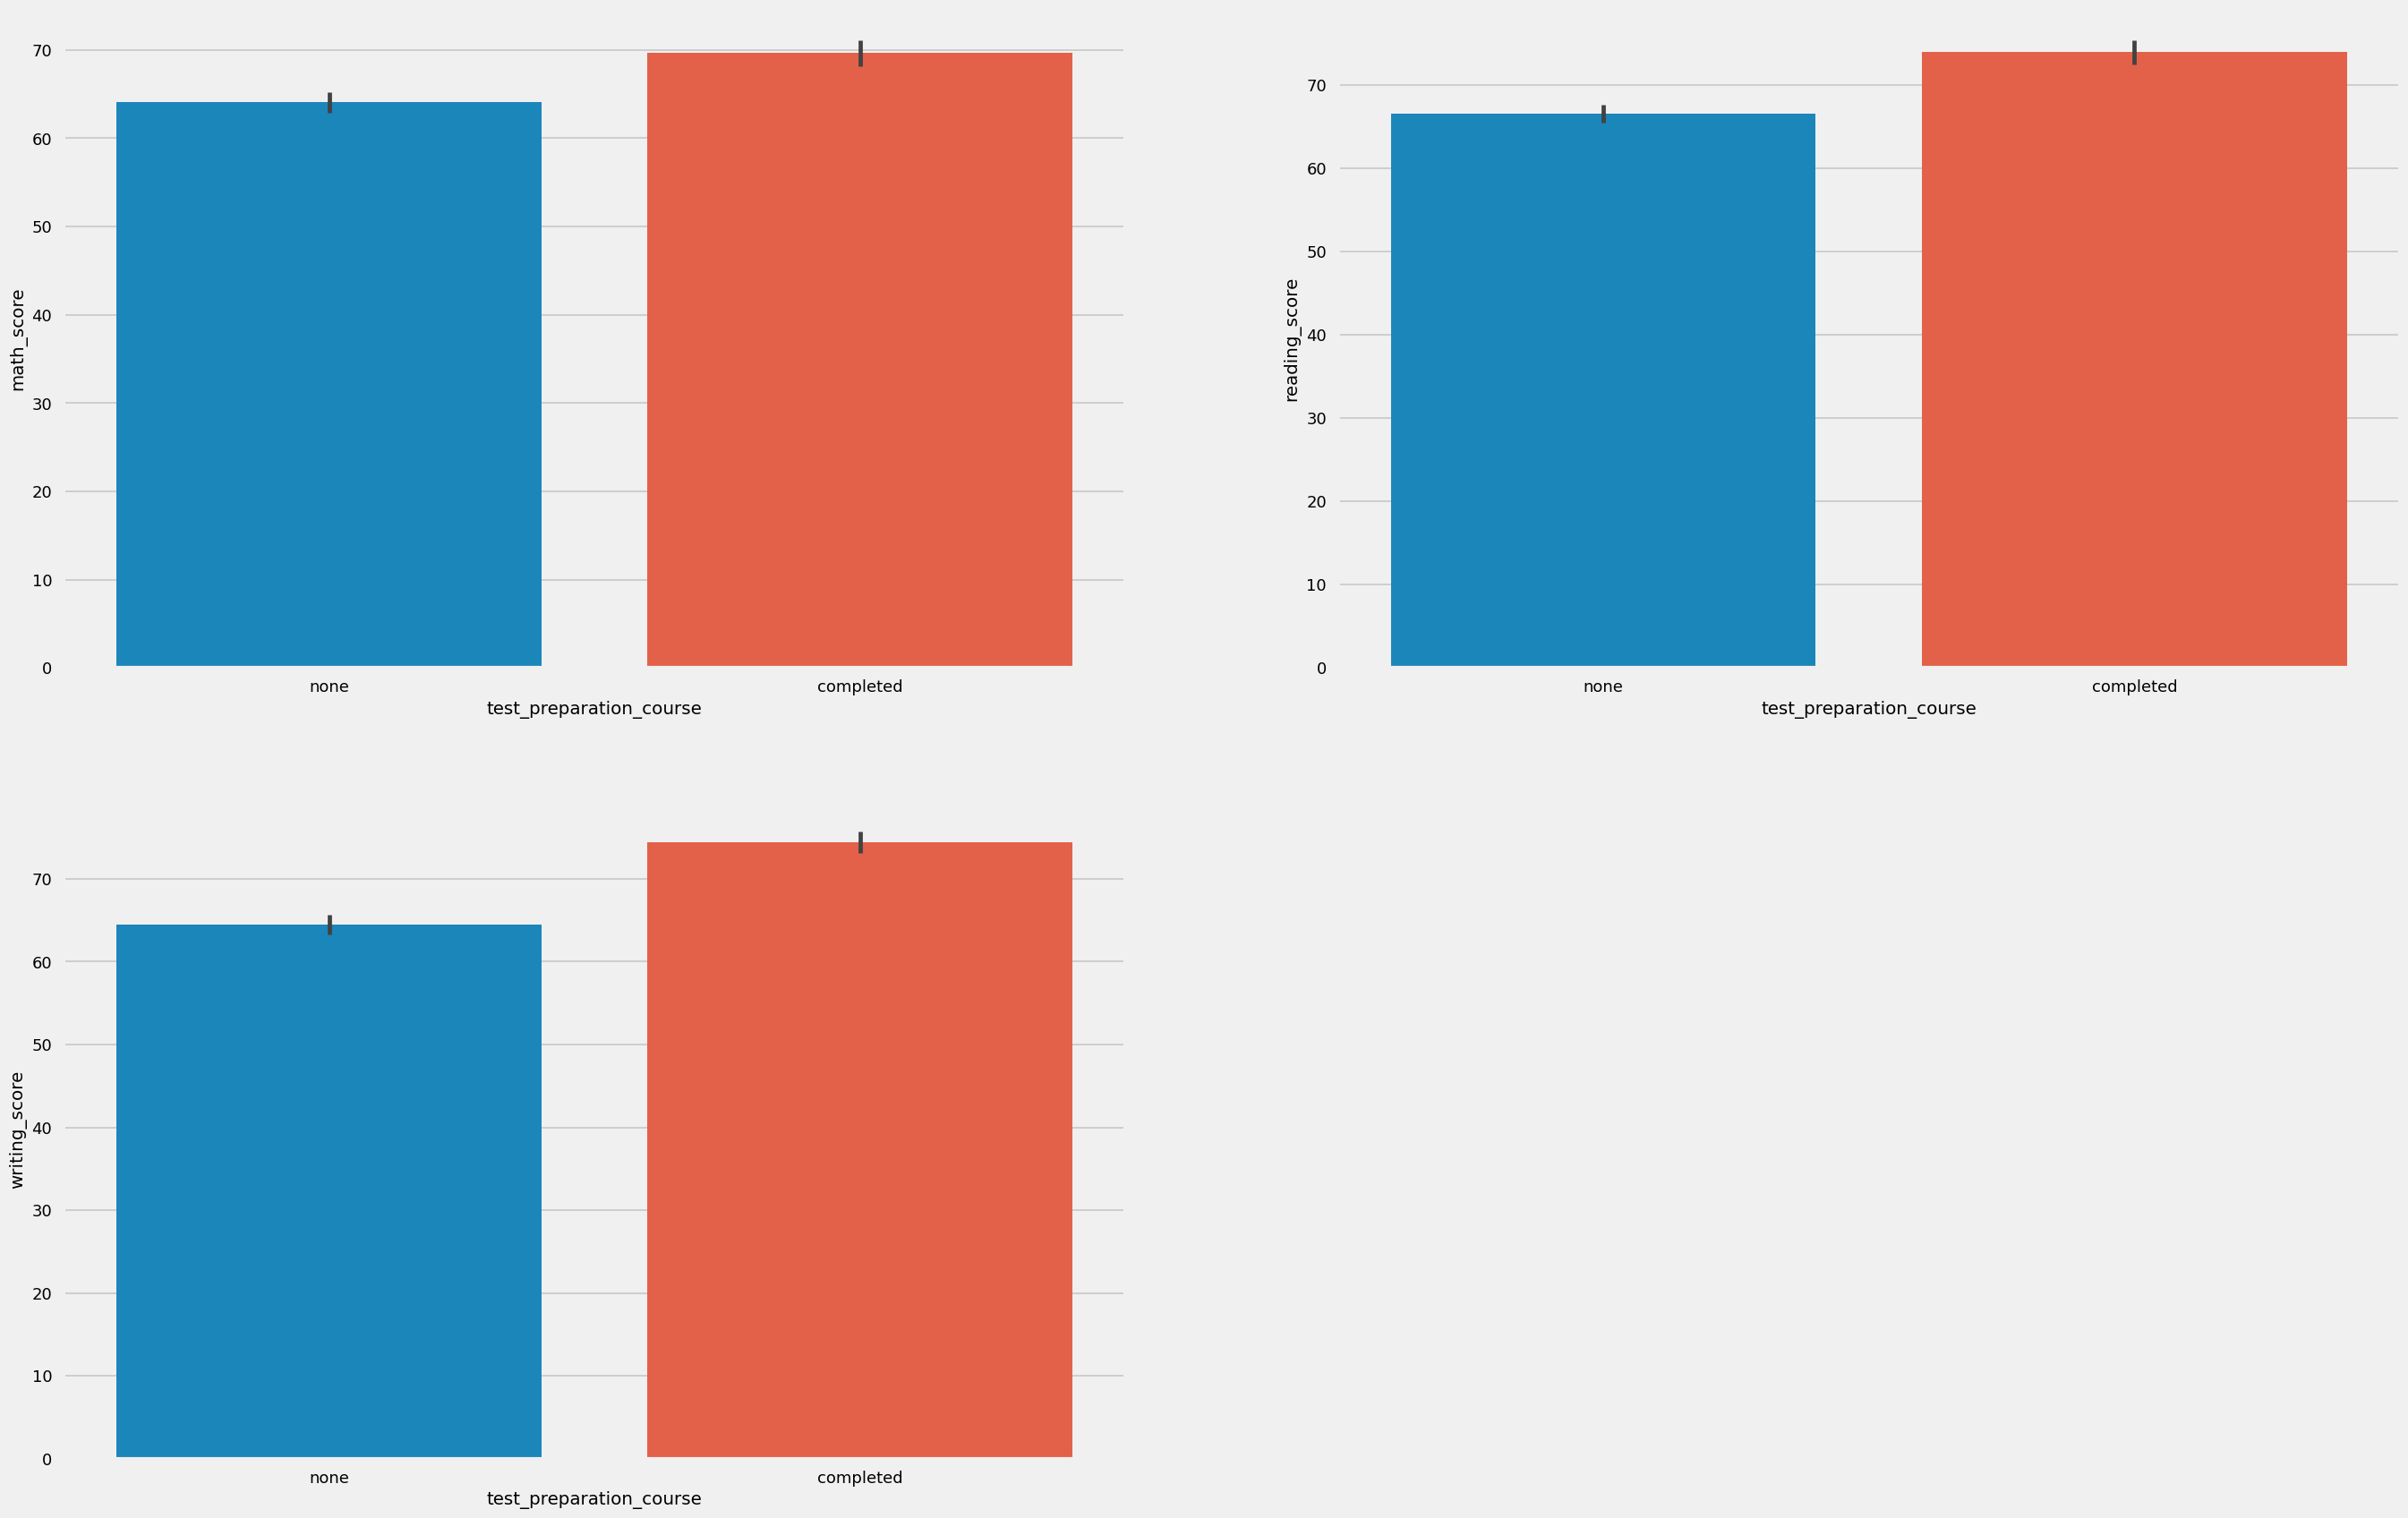

In [48]:
plt.figure(figsize=(30, 20))
plt.subplot(2, 2, 1)
sns.barplot(x = df['test_preparation_course'], y = df['math_score'], hue = df['test_preparation_course'])
plt.subplot(2, 2, 2)
sns.barplot(x = df['test_preparation_course'], y = df['reading_score'], hue = df['test_preparation_course'])
plt.subplot(2, 2, 3)
sns.barplot(x = df['test_preparation_course'], y = df['writing_score'], hue = df['test_preparation_course'])
plt.show()

Insight
- Students who have completed the test preparation course have higher scores in all three categories than students who has not taken the course.

4.4.6 Checking Outliers

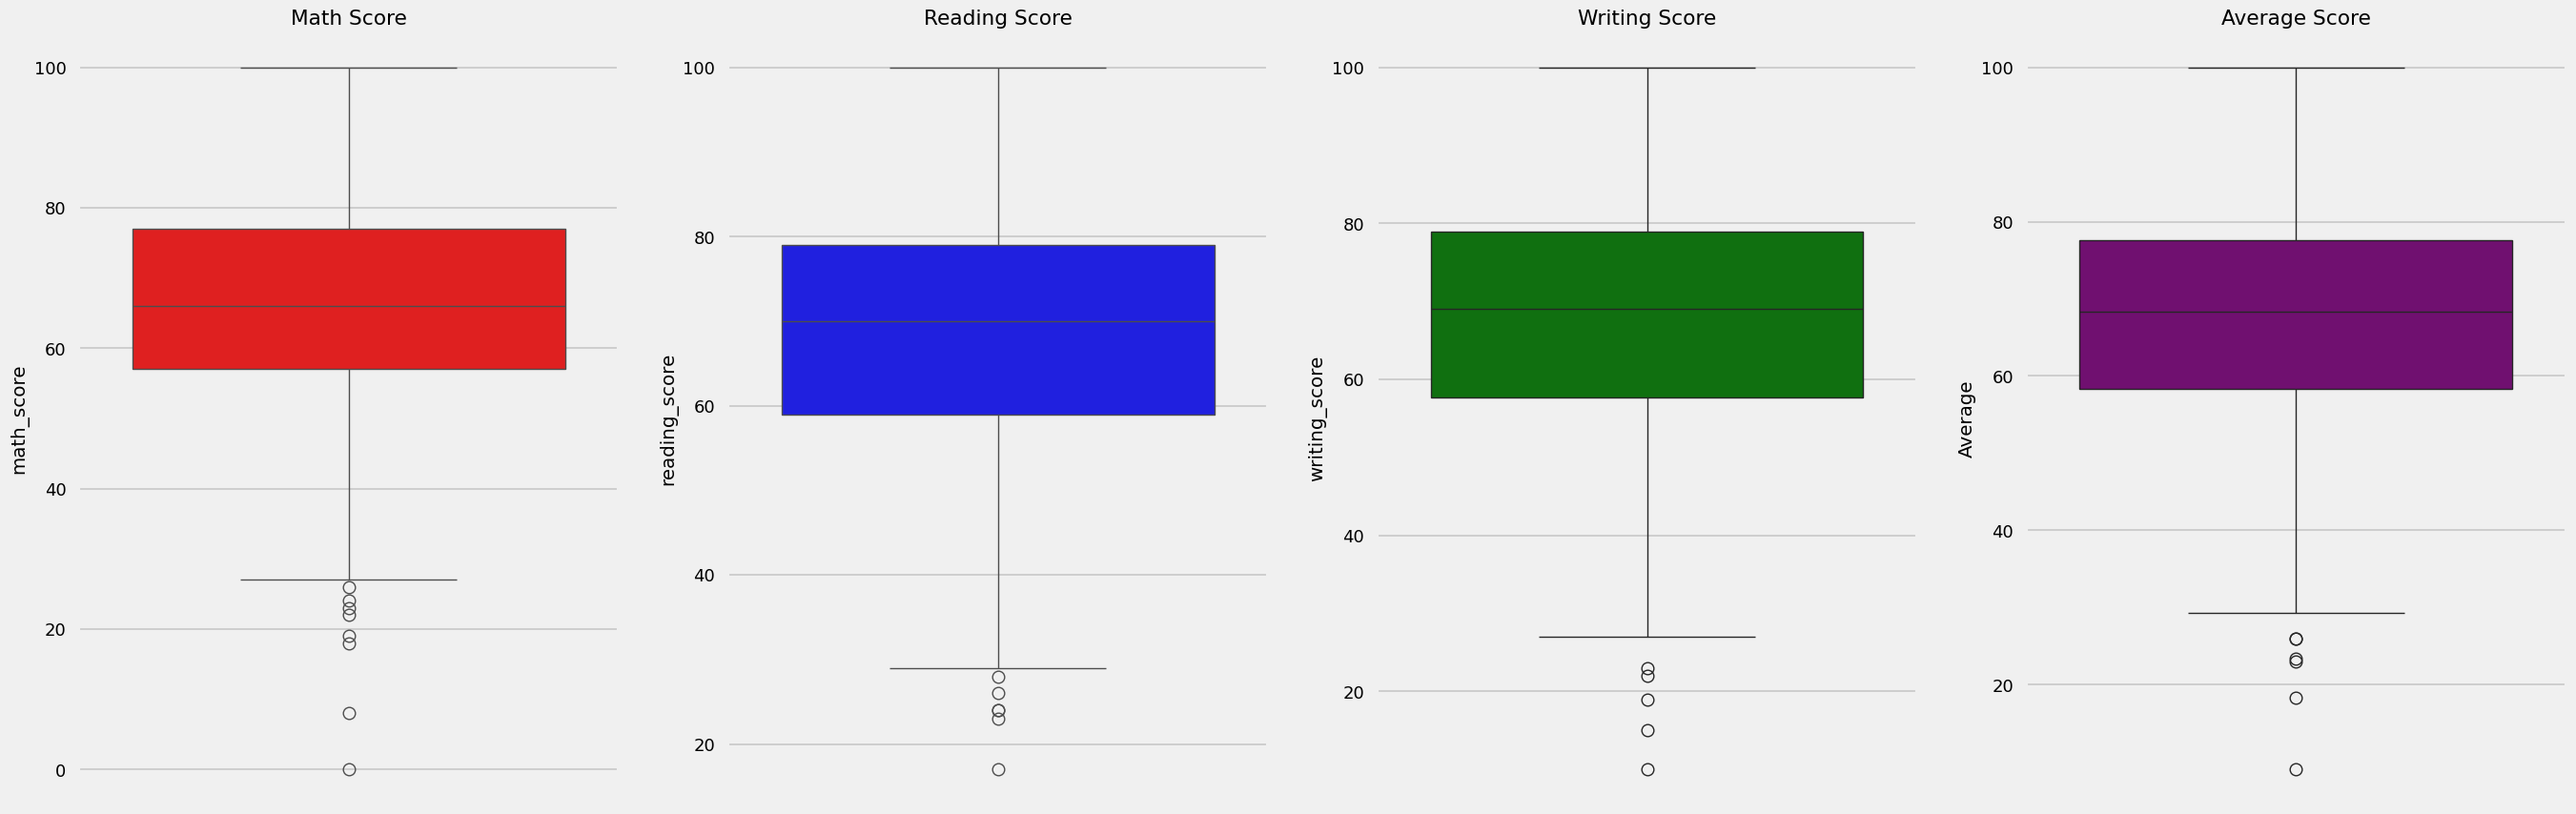

In [51]:
plt.subplots(1, 4, figsize=(30, 10))
plt.subplot(141)
sns.boxplot(df['math_score'], color = 'red')
plt.title('Math Score')
plt.subplot(142)
sns.boxplot(df['reading_score'], color = 'blue')
plt.title('Reading Score')
plt.subplot(143)
sns.boxplot(df['writing_score'], color = 'green')
plt.title('Writing Score')
plt.subplot(144)
sns.boxplot(df['Average'], color = 'purple')
plt.title('Average Score')
plt.show()

4.4.7 Multivariate Analysis using Pairplot

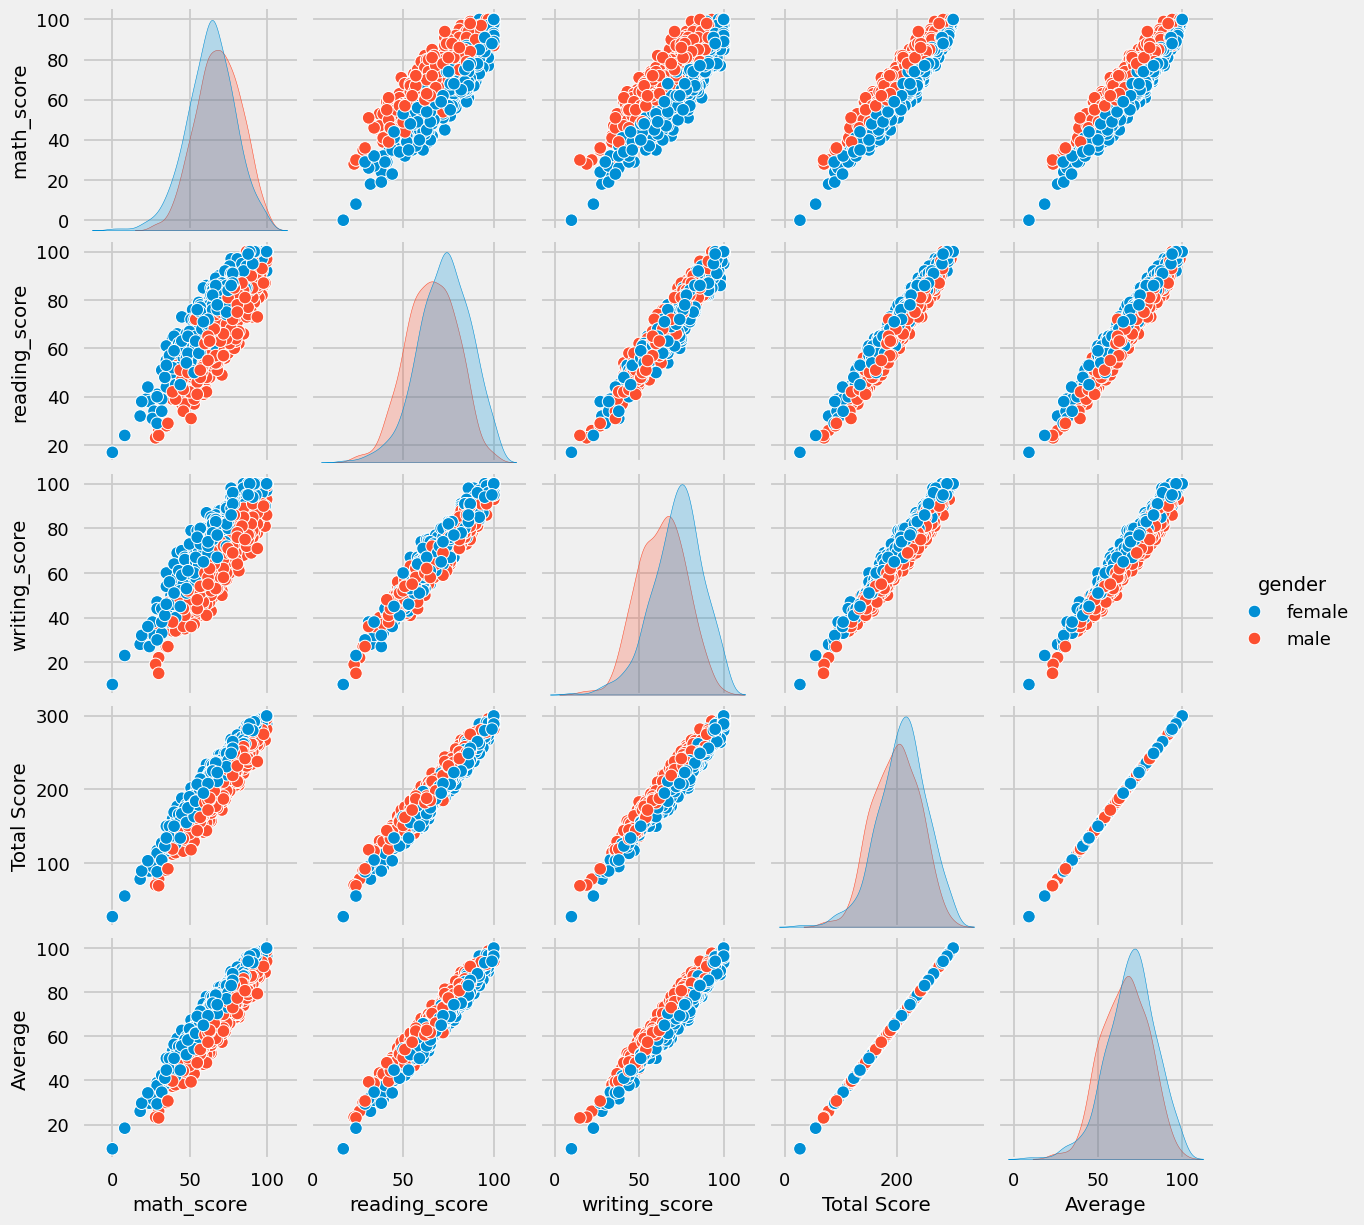

In [52]:
sns.pairplot(df, hue = 'gender')
plt.show()

Insight
- From the above plot it is clear that all the scores increase linearly with each other.

5 Conclusions
- Student's performance is related with lunch, race, parental level of education.
- Females lead in pass percentage and also are top scorers.
- Student's performance is not much related with test preparation course.
- Finishing preparation course is benificial.